AAAAAAAAAAAAAAA
1943


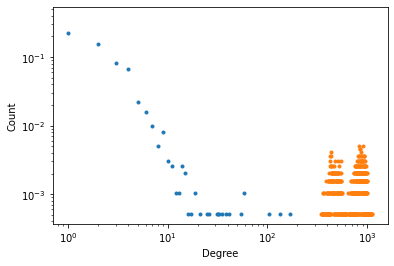

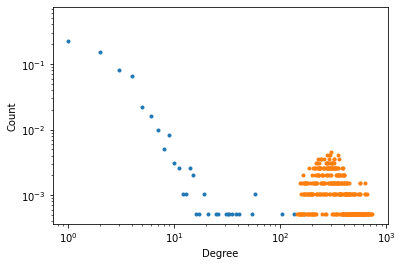

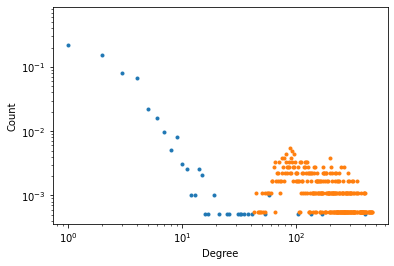

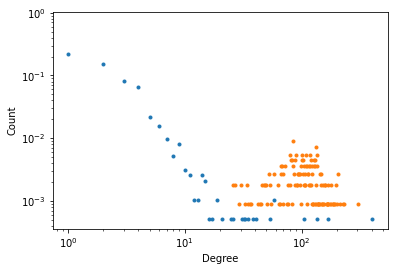

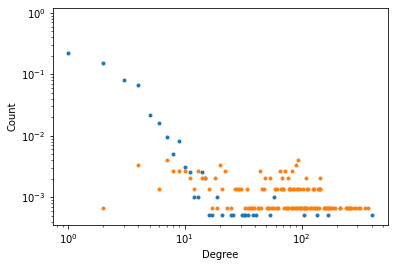

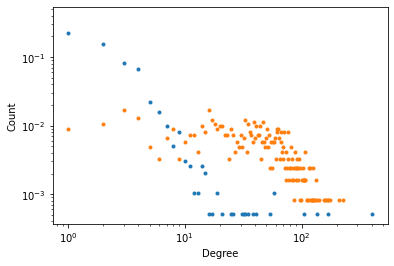

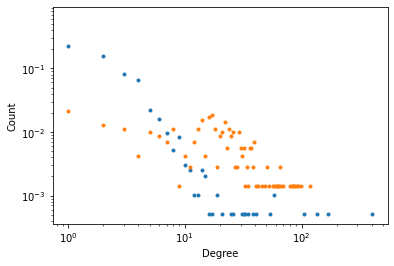

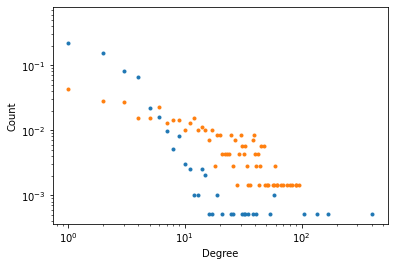

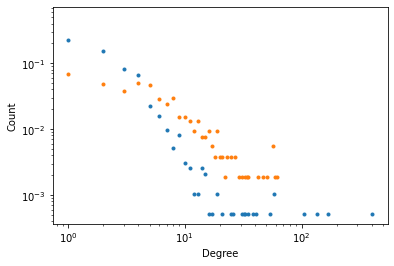

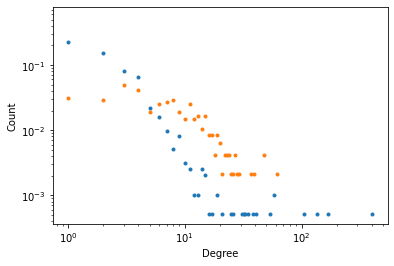

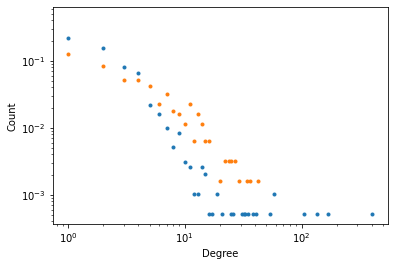

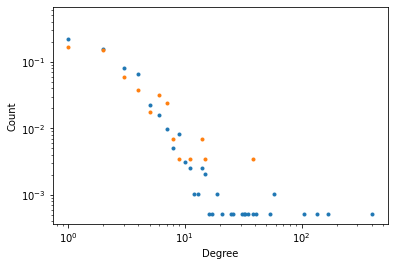

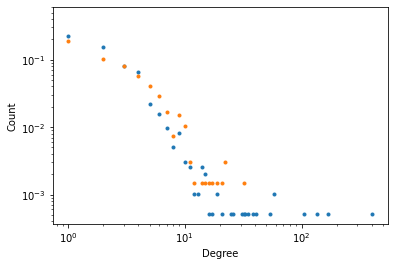

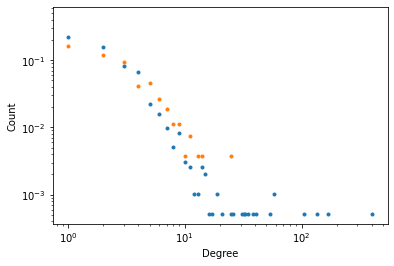

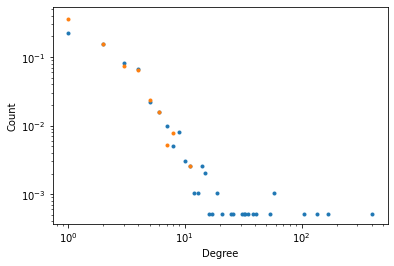

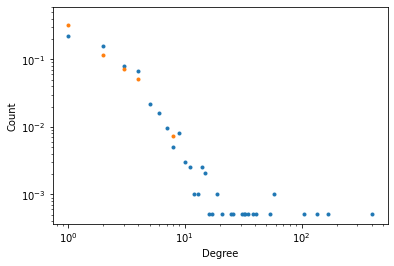

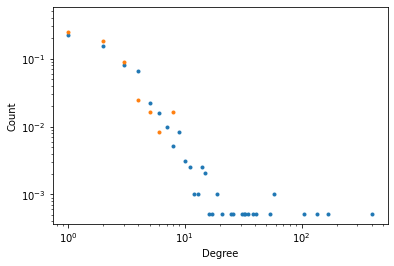

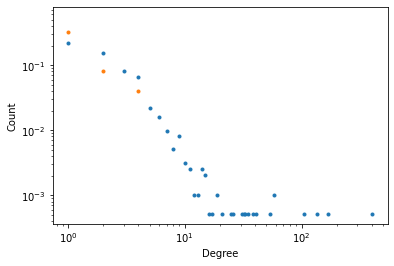

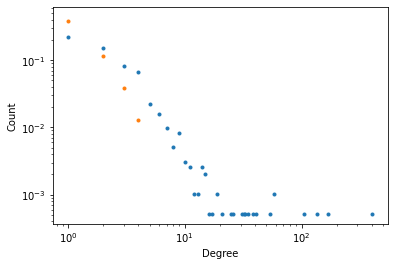

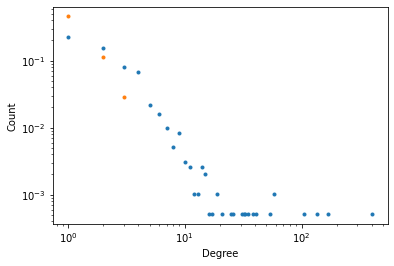

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)
#ut.loglog_degree_sequence_plot(G_coli)
'''
bins = np.arange(0, 200, 1) # fixed bin size

#plt.xlim([0, 200])



hist, bins = np.histogram(outList, bins=bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(outList, bins=bins, alpha=0.5,log=True)
plt.xscale('log')
plt.title('')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()
'''
G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
G_vec=[]
for q in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:

    G_q=dup.ped_pea_single_lineage(G,steps,0,q,iteration=0,isolated_nodes_allowed=False)
    
    #for i in G_q.nodes():
    #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
    #        node_remover.append(i)
    #if len(node_remover)!=0:
    #    G_q.remove_nodes_from(node_remover)
    G_vec.append(G_q)
    #ut.pair_loglog_degree_sequence_plot(G_q,G)
        
    #G=nx.Graph()
    #for e in G_sorg.edges():
    #    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


    #nt = Network('1000px', '1000px',directed=True)

    #nt.from_nx(G_coli)
    #nt.show_buttons()
    #nt.show('nx.html')
    plt.figure()
    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_coli.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_coli.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_coli.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_q.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_q.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_q.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    plt.xscale('log')
    plt.yscale('log')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()

    


In [9]:
import pickle
with open('G_vec.pkl', 'wb') as f:
    pickle.dump(G_vec, f)



In [ ]:


with open('G_vec.pkl', 'rb') as f:
    mybist=pickle.load(f)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
print(G_col.nodes)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)

G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
G_dict=dict()
for r in [0.5]:
    for q in [0.7]:
        G_dict[(r,q)]=[]
        for i in range(1):
            print(r,q,i)
            G_q=dup.ped_pea_single_lineage(G,steps,r,q,iteration=0,isolated_nodes_allowed=False)
            
            #for i in G_q.nodes():
            #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
            #        node_remover.append(i)
            #if len(node_remover)!=0:
            #    G_q.remove_nodes_from(node_remover)
            G_dict[(r,q)].append(G_q)

with open('G_dict_rq.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


AAAAAAAAAAAAAAA
['accb', 'accc', 'acrr', 'acra', 'acrb', 'flhc', 'flhd', 'mara', 'marb', 'marr', 'micf', 'soxr', 'soxs', 'ada', 'aidb', 'alka', 'alkb', 'adiy', 'adia', 'gada', 'gadb', 'gadc', 'gadx', 'gltb', 'gltd', 'gltf', 'agar', 'agaa', 'agab', 'agac', 'agad', 'agai', 'agas', 'agav', 'agaw', 'kbay', 'kbaz', 'appy', 'appa', 'appb', 'appc', 'appx', 'hyaa', 'hyab', 'hyac', 'hyad', 'hyae', 'hyaf', 'arac', 'araa', 'arab', 'arad', 'arae', 'araf', 'arag', 'arah', 'araj', 'xyla', 'xylb', 'ydem', 'yden', 'ygea', 'arca', 'acea', 'aceb', 'acee', 'acef', 'acek', 'acka', 'acna', 'acnb', 'alda', 'arcz', 'beta', 'betb', 'beti', 'bett', 'cada', 'cadb', 'caia', 'caib', 'caic', 'caid', 'caie', 'cait', 'citc', 'citd', 'cite', 'citf', 'citg', 'citx', 'cyda', 'cydb', 'cydc', 'cydd', 'cyoa', 'cyob', 'cyoc', 'cyod', 'cyoe', 'dcta', 'dcuc', 'dpia', 'dpib', 'fada', 'fadb', 'fadd', 'fade', 'fadh', 'fadi', 'fadj', 'fadl', 'fnr', 'foca', 'fuma', 'fumb', 'fumc', 'gade', 'gadf', 'gata', 'gatb', 'gatc', 'gatd', '

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js
with open('G_dict_rq.pkl', 'rb') as f:
    mybist=pickle.load(f)

0.0021625427479380404


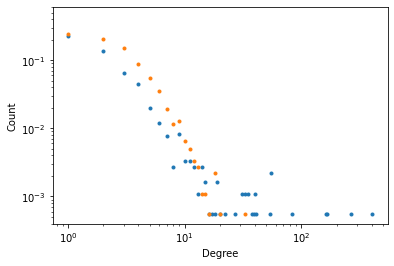

In [3]:
    print(nx.transitivity(mybist[(0.5,0.7)][0]))
    plt.figure()
    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_coli.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_coli.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_coli.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_q.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_q.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_q.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    plt.xscale('log')
    plt.yscale('log')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()



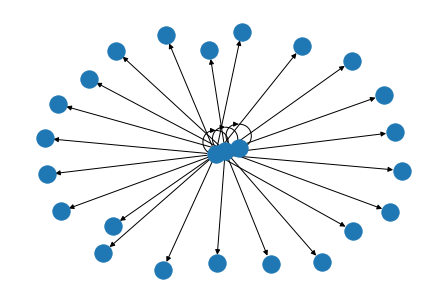

In [5]:
pos=nx.kamada_kawai_layout(dup.GRN_seed_graph())
nx.draw(dup.GRN_seed_graph())
